<a href="https://colab.research.google.com/github/dewirizki/datathon2021/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 80 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 27.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=a42565330e9604047657fac4ae1c8d1cad9f29eeddd59a9fcdbd5babd5a511d2
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=77f68dea31f733628e185fe0e86a34e66c15d34ad248dae4637320b65461f936
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent
--2021-08-17 05:56:10--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133

In [3]:
import pandas as pd
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, tau_unsup as tau
import plotly.express as px

# Meload Dataset

In [4]:
#Import Data
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/malinaafemi/datathon2021/main/Data%20Vaksinasi%20dan%20Jumlah%20Penduduk%20Indonesia.csv

--2021-08-17 05:56:13--  https://raw.githubusercontent.com/malinaafemi/datathon2021/main/Data%20Vaksinasi%20dan%20Jumlah%20Penduduk%20Indonesia.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51364 (50K) [text/plain]
Saving to: ‘data/Data Vaksinasi dan Jumlah Penduduk Indonesia.csv’

Data Vaksinasi dan  100%[===================>]  50.16K  --.-KB/s    in 0.01s   

2021-08-17 05:56:13 (3.96 MB/s) - ‘data/Data Vaksinasi dan Jumlah Penduduk Indonesia.csv’ saved [51364/51364]



## Dibuat menjadi dataframe

In [5]:
data = pd.read_csv("/content/data/Data Vaksinasi dan Jumlah Penduduk Indonesia.csv")

In [6]:
data

,Tanggal,Kota,Tingkat Vaksinasi,Dalam atau Luar Jawa Bali,Jumlah Penduduk,Luas Daerah
0,07/05/2021,Jakarta,22.70%,0,10562088,664.01
1,07/06/2021,Jakarta,22.73%,0,10562088,664.01
2,07/07/2021,Jakarta,22.76%,0,10562088,664.01
3,07/08/2021,Jakarta,22.80%,0,10562088,664.01
4,07/09/2021,Jakarta,22.83%,0,10562088,664.01
...,...,...,...,...,...,...
1051,08/01/2021,Lampung,5.69%,1,9007848,34623.80
1052,08/02/2021,Lampung,5.83%,1,9007848,34623.80
1053,08/03/2021,Lampung,5.90%,1,9007848,34623.80
1054,08/04/2021,Lampung,6.00%,1,9007848,34623.80


In [7]:
data.head(10)

,Tanggal,Kota,Tingkat Vaksinasi,Dalam atau Luar Jawa Bali,Jumlah Penduduk,Luas Daerah
0,07/05/2021,Jakarta,22.70%,0,10562088,664.01
1,07/06/2021,Jakarta,22.73%,0,10562088,664.01
2,07/07/2021,Jakarta,22.76%,0,10562088,664.01
3,07/08/2021,Jakarta,22.80%,0,10562088,664.01
4,07/09/2021,Jakarta,22.83%,0,10562088,664.01
5,07/10/2021,Jakarta,22.84%,0,10562088,664.01
6,07/11/2021,Jakarta,22.85%,0,10562088,664.01
7,07/12/2021,Jakarta,22.89%,0,10562088,664.01
8,07/13/2021,Jakarta,22.93%,0,10562088,664.01
9,07/14/2021,Jakarta,22.97%,0,10562088,664.01


In [8]:
data

,Tanggal,Kota,Tingkat Vaksinasi,Dalam atau Luar Jawa Bali,Jumlah Penduduk,Luas Daerah
0,07/05/2021,Jakarta,22.70%,0,10562088,664.01
1,07/06/2021,Jakarta,22.73%,0,10562088,664.01
2,07/07/2021,Jakarta,22.76%,0,10562088,664.01
3,07/08/2021,Jakarta,22.80%,0,10562088,664.01
4,07/09/2021,Jakarta,22.83%,0,10562088,664.01
...,...,...,...,...,...,...
1051,08/01/2021,Lampung,5.69%,1,9007848,34623.80
1052,08/02/2021,Lampung,5.83%,1,9007848,34623.80
1053,08/03/2021,Lampung,5.90%,1,9007848,34623.80
1054,08/04/2021,Lampung,6.00%,1,9007848,34623.80


In [9]:
data.tail(10)

,Tanggal,Kota,Tingkat Vaksinasi,Dalam atau Luar Jawa Bali,Jumlah Penduduk,Luas Daerah
1046,07/27/2021,Lampung,5.29%,1,9007848,34623.8
1047,07/28/2021,Lampung,5.46%,1,9007848,34623.8
1048,07/29/2021,Lampung,5.57%,1,9007848,34623.8
1049,07/30/2021,Lampung,5.63%,1,9007848,34623.8
1050,07/31/2021,Lampung,5.68%,1,9007848,34623.8
1051,08/01/2021,Lampung,5.69%,1,9007848,34623.8
1052,08/02/2021,Lampung,5.83%,1,9007848,34623.8
1053,08/03/2021,Lampung,5.90%,1,9007848,34623.8
1054,08/04/2021,Lampung,6.00%,1,9007848,34623.8
1055,08/05/2021,Lampung,6.12%,1,9007848,34623.8


In [10]:
data.sample(10)

,Tanggal,Kota,Tingkat Vaksinasi,Dalam atau Luar Jawa Bali,Jumlah Penduduk,Luas Daerah
253,08/03/2021,Kep. Riau,15.58%,1,2064564,8201.72
75,07/16/2021,yogyakarta,14.00%,0,3668719,3133.15
680,07/13/2021,Sulawesi Barat,5.93%,1,1419229,16787.18
240,07/21/2021,Kep. Riau,11.82%,1,2064564,8201.72
331,07/16/2021,Gorontalo,7.98%,1,1171681,11257.07
279,07/28/2021,Sulawesi Utara,9.02%,1,2621923,13851.64
320,07/05/2021,Gorontalo,6.71%,1,1171681,11257.07
974,07/19/2021,Kalimantan Barat,5.00%,1,5414390,147307.00
983,07/28/2021,Kalimantan Barat,6.25%,1,5414390,147307.00
294,07/11/2021,Jambi,6.10%,1,3548228,50058.16


In [11]:
data.columns

Index(['Tanggal', 'Kota', 'Tingkat Vaksinasi', 'Dalam atau Luar Jawa Bali',
       'Jumlah Penduduk', 'Luas Daerah'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tanggal                    1056 non-null   object 
 1   Kota                       1056 non-null   object 
 2   Tingkat Vaksinasi          1056 non-null   object 
 3   Dalam atau Luar Jawa Bali  1056 non-null   int64  
 4   Jumlah Penduduk            1056 non-null   int64  
 5   Luas Daerah                1056 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 49.6+ KB


In [13]:
data['Tanggal'] = data['Tanggal'].astype('datetime64')
data.dtypes

Tanggal                      datetime64[ns]
Kota                                 object
Tingkat Vaksinasi                    object
Dalam atau Luar Jawa Bali             int64
Jumlah Penduduk                       int64
Luas Daerah                         float64
dtype: object

In [14]:
data.dtypes

Tanggal                      datetime64[ns]
Kota                                 object
Tingkat Vaksinasi                    object
Dalam atau Luar Jawa Bali             int64
Jumlah Penduduk                       int64
Luas Daerah                         float64
dtype: object

In [15]:
data['Tingkat Vaksinasi'] = data['Tingkat Vaksinasi'].str.rstrip('%').astype('float') / 100.0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal                    1056 non-null   datetime64[ns]
 1   Kota                       1056 non-null   object        
 2   Tingkat Vaksinasi          1056 non-null   float64       
 3   Dalam atau Luar Jawa Bali  1056 non-null   int64         
 4   Jumlah Penduduk            1056 non-null   int64         
 5   Luas Daerah                1056 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 49.6+ KB


In [17]:
data['Dalam atau Luar Jawa Bali'] = data['Dalam atau Luar Jawa Bali'].astype('category')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal                    1056 non-null   datetime64[ns]
 1   Kota                       1056 non-null   object        
 2   Tingkat Vaksinasi          1056 non-null   float64       
 3   Dalam atau Luar Jawa Bali  1056 non-null   category      
 4   Jumlah Penduduk            1056 non-null   int64         
 5   Luas Daerah                1056 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 42.5+ KB


In [19]:
penduduk = data.groupby('Kota', as_index=False)['Jumlah Penduduk'].\
    mean().dropna()
penduduk

,Kota,Jumlah Penduduk
0,Aceh,5274871
1,Bali,4317404
2,Bangka Belitung,1455678
3,Banten,11904562
4,Bengkulu,2010670
5,Gorontalo,1171681
6,Jakarta,10562088
7,Jambi,3548228
8,Jawa Barat,48274162
9,Jawa Timur,40665696


In [20]:
luas = data.groupby('Kota', as_index=False)['Luas Daerah'].\
    mean().dropna()
luas

,Kota,Luas Daerah
0,Aceh,57956.00
1,Bali,5780.06
2,Bangka Belitung,16424.06
3,Banten,9662.92
4,Bengkulu,19919.33
5,Gorontalo,11257.07
6,Jakarta,664.01
7,Jambi,50058.16
8,Jawa Barat,35377.76
9,Jawa Timur,47799.75


In [21]:
df = pd.concat([luas,penduduk['Jumlah Penduduk']], axis=1)

In [22]:
df

,Kota,Luas Daerah,Jumlah Penduduk
0,Aceh,57956.00,5274871
1,Bali,5780.06,4317404
2,Bangka Belitung,16424.06,1455678
3,Banten,9662.92,11904562
4,Bengkulu,19919.33,2010670
5,Gorontalo,11257.07,1171681
6,Jakarta,664.01,10562088
7,Jambi,50058.16,3548228
8,Jawa Barat,35377.76,48274162
9,Jawa Timur,47799.75,40665696


In [23]:
fig = px.bar(df, x='Kota', y="Luas Daerah", title = 'Luas Daerah Provinsi di Indonesia', width=1200, height=700, color="Kota")
fig.show()

In [24]:
fig2 = px.bar(df, x='Kota', y="Jumlah Penduduk", title = 'Jumlah Penduduk Provinsi-provinsi di Indonesia', width=1200, height=700, color="Kota")
fig2.show()

In [25]:
fig3 = px.scatter(df, x="Luas Daerah", y="Jumlah Penduduk", color="Kota")
fig3.show()

## Statistika Sederhana

In [26]:
#Statistika Deskriptif kesuluruhan variabel
df.describe(include='all')

,Kota,Luas Daerah,Jumlah Penduduk
count,33,33.000000,3.300000e+01
unique,33,NaN,NaN
top,Kep. Riau,NaN,NaN
freq,1,NaN,NaN
mean,NaN,57018.066061,8.149121e+06
std,NaN,61782.269811,1.140399e+07
min,NaN,664.010000,7.018140e+05
25%,NaN,16787.180000,2.621923e+06
50%,NaN,42012.890000,4.303707e+06
75%,NaN,72981.230000,8.467432e+06


In [27]:
#statistika deskriptif jumlah penduduk dan luas daerah
df[['Jumlah Penduduk','Luas Daerah']].describe(include='all')

,Jumlah Penduduk,Luas Daerah
count,3.300000e+01,33.000000
mean,8.149121e+06,57018.066061
std,1.140399e+07,61782.269811
min,7.018140e+05,664.010000
25%,2.621923e+06,16787.180000
50%,4.303707e+06,42012.890000
75%,8.467432e+06,72981.230000
max,4.827416e+07,319036.050000


# Elbow Curve

## K-Means

In [28]:
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

In [29]:
X = df[['Luas Daerah','Jumlah Penduduk']].values

Text(0.5, 1.0, 'Elbow curve')

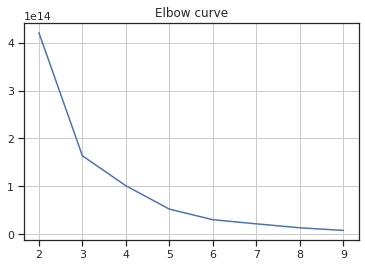

In [30]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


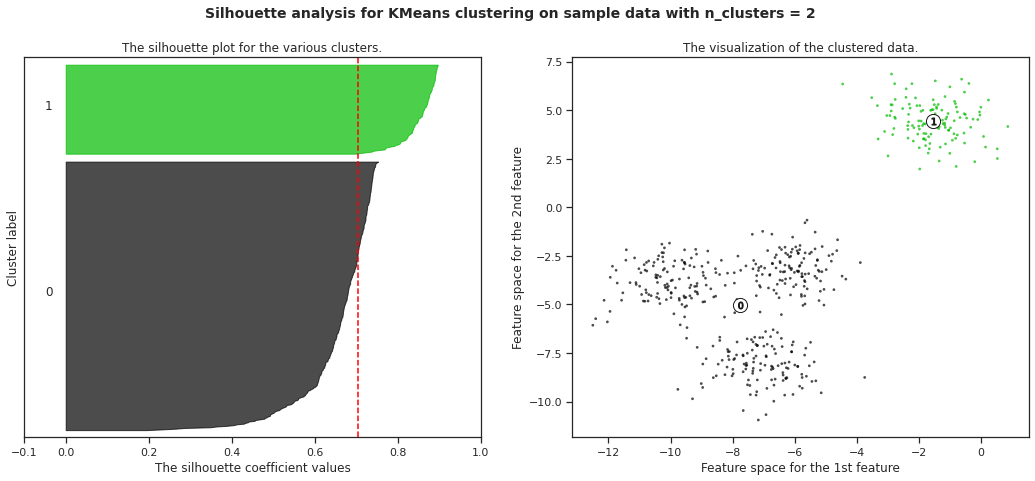

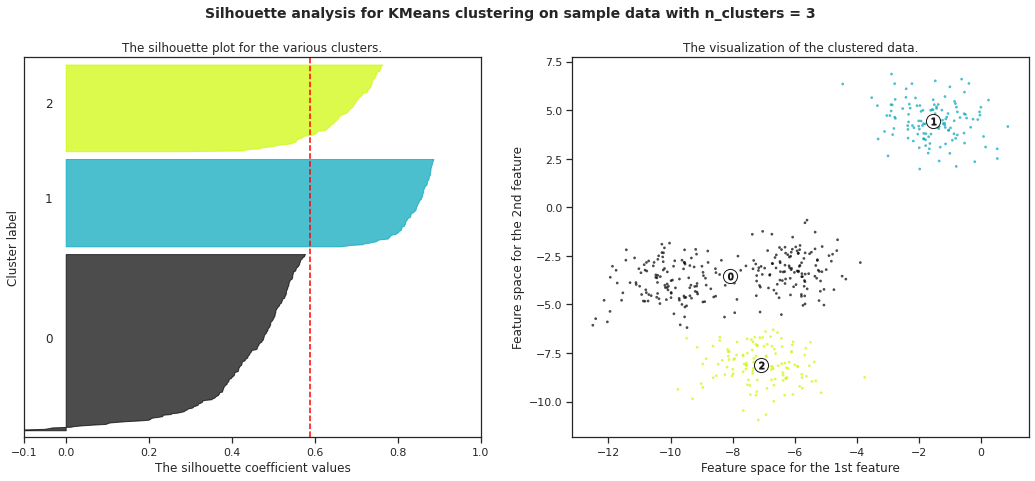

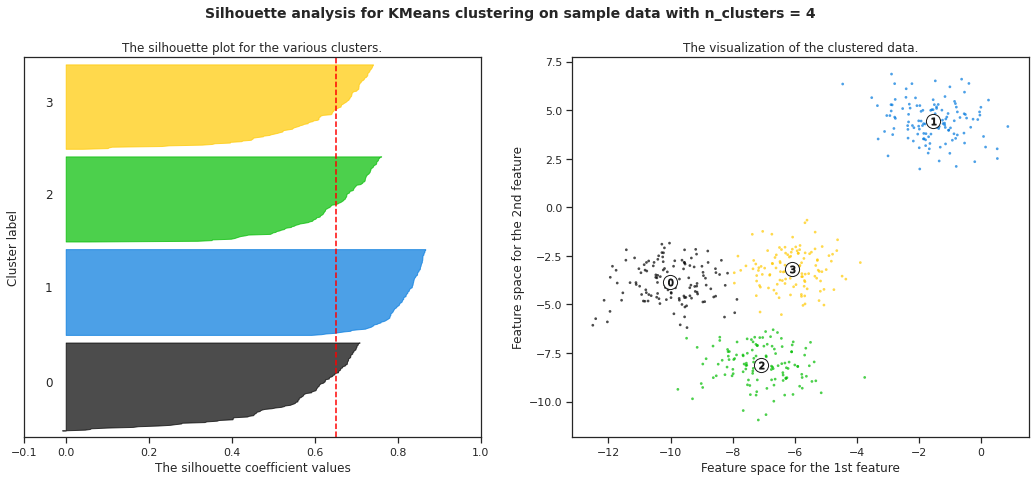

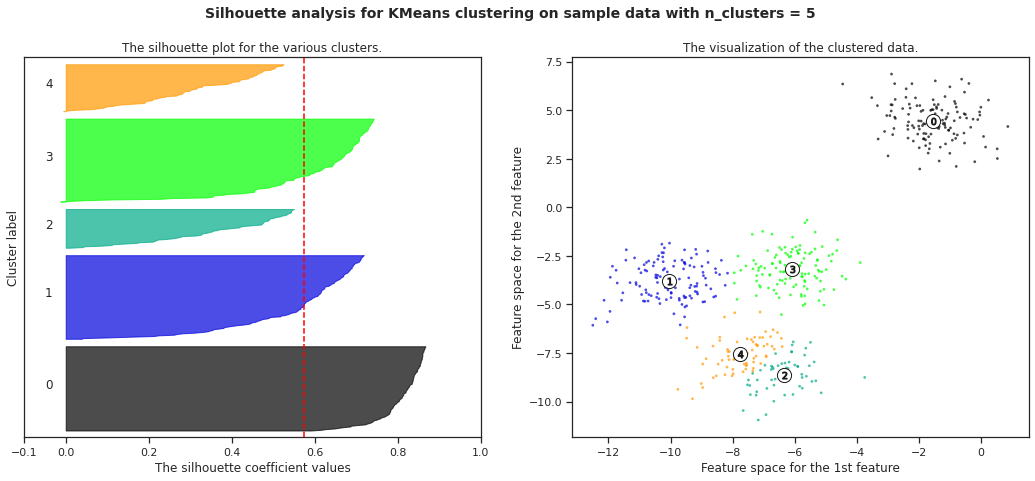

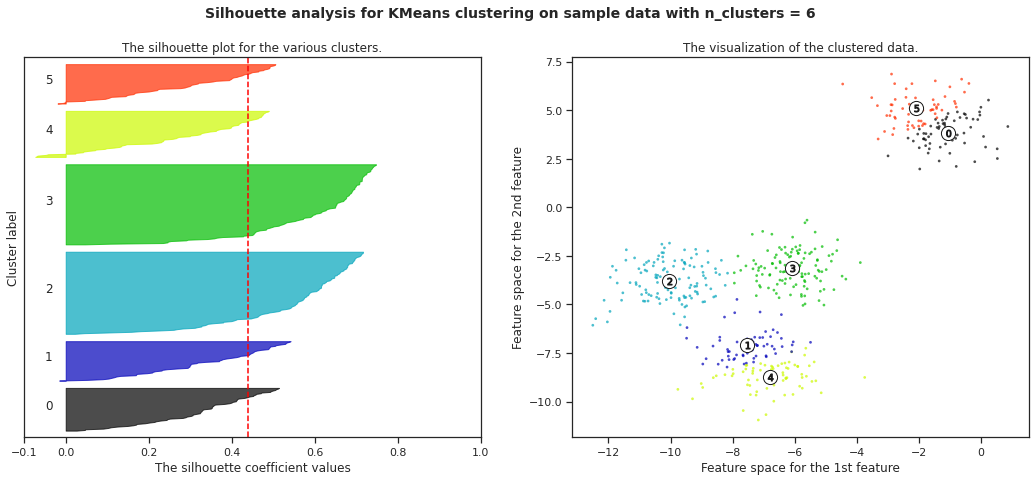

In [31]:
tau.sil_based_optimal_km()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



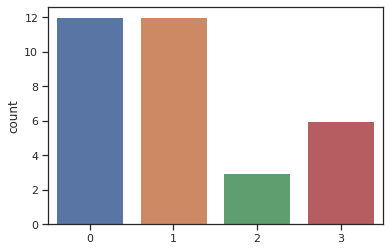

In [32]:
k = 4
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

In [33]:
C_km

array([1, 1, 0, 3, 0, 0, 3, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 1,
       0, 1, 0, 3, 0, 0, 0, 1, 3, 3, 1], dtype=int32)

In [34]:
df['Cluster'] = pd.Series(C_km, index=df.index)

In [35]:
df

,Kota,Luas Daerah,Jumlah Penduduk,Cluster
0,Aceh,57956.00,5274871,1
1,Bali,5780.06,4317404,1
2,Bangka Belitung,16424.06,1455678,0
3,Banten,9662.92,11904562,3
4,Bengkulu,19919.33,2010670,0
5,Gorontalo,11257.07,1171681,0
6,Jakarta,664.01,10562088,3
7,Jambi,50058.16,3548228,1
8,Jawa Barat,35377.76,48274162,2
9,Jawa Timur,47799.75,40665696,2


In [36]:
km.inertia_

114934406665614.95

In [37]:
data2 = data.drop(['Dalam atau Luar Jawa Bali','Luas Daerah','Jumlah Penduduk'], axis=1)

In [38]:
data2

,Tanggal,Kota,Tingkat Vaksinasi
0,2021-07-05,Jakarta,0.2270
1,2021-07-06,Jakarta,0.2273
2,2021-07-07,Jakarta,0.2276
3,2021-07-08,Jakarta,0.2280
4,2021-07-09,Jakarta,0.2283
...,...,...,...
1051,2021-08-01,Lampung,0.0569
1052,2021-08-02,Lampung,0.0583
1053,2021-08-03,Lampung,0.0590
1054,2021-08-04,Lampung,0.0600


In [39]:
data2= data2.set_index(['Tanggal'])
data2

,Kota,Tingkat Vaksinasi
Tanggal,,
2021-07-05,Jakarta,0.2270
2021-07-06,Jakarta,0.2273
2021-07-07,Jakarta,0.2276
2021-07-08,Jakarta,0.2280
2021-07-09,Jakarta,0.2283
...,...,...
2021-08-01,Lampung,0.0569
2021-08-02,Lampung,0.0583
2021-08-03,Lampung,0.0590


In [40]:
data2['Kota'].unique()

array(['Jakarta', 'Bali', 'yogyakarta', 'Banten', 'Jawa tengah',
       'Jawa Barat', 'Jawa Timur', 'Kep. Riau', 'Sulawesi Utara', 'Jambi',
       'Gorontalo', 'Kalimantan Tengah', 'Sulawesi Selatan',
       'Papua Barat', 'Sulawesi Tenggara', 'Bangka Belitung', 'Riau',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sumatera Utara', 'Aceh',
       'Sulawesi Barat', 'Bengkulu', 'NTT', 'Sumatera Selatan', 'Maluku',
       'NTB', 'Sulawesi Tengah', 'Sumatera Barat', 'Kalimantan Selatan',
       'Kalimantan Barat', 'Papua', 'Lampung'], dtype=object)

In [41]:
kluster_dict ={'Jakarta' : 3, 'Bali' : 1, 'yogyakarta' : 1, 'Banten' : 3, 'Jawa tengah' : 2,
               'Jawa Barat' : 2, 'Jawa Timur' : 2, 'Kep. Riau' : 0, 'Sulawesi Utara' : 0, 'Jambi' : 1, 
               'Gorontalo' : 0, 'Kalimantan Tengah' : 0, 'Sulawesi Selatan' : 3,
               'Papua Barat' : 0, 'Sulawesi Tenggara' : 0, 'Bangka Belitung' : 0, 'Riau' : 1,
               'Kalimantan Timur' : 1, 'Kalimantan Utara' : 0, 'Sumatera Utara' : 0, 'Aceh' : 1,
               'Sulawesi Barat' : 0, 'Bengkulu' : 0, 'NTT' : 1, 'Sumatera Selatan' : 3, 'Maluku' : 0,
               'NTB' : 1, 'Sulawesi Tengah' : 0, 'Sumatera Barat' : 1, 'Kalimantan Selatan' : 1,
               'Kalimantan Barat' : 1, 'Papua' : 1, 'Lampung' : 3}

In [42]:
data2['Kluster'] = data2['Kota'].map(kluster_dict)

In [43]:
data2.sample(10)

,Kota,Tingkat Vaksinasi,Kluster
Tanggal,,,
2021-07-10,Sumatera Barat,0.0380,1
2021-07-09,Papua,0.0518,1
2021-07-11,Sulawesi Tenggara,0.0538,0
2021-07-27,Sumatera Utara,0.0817,0
2021-07-31,Sulawesi Tenggara,0.0752,0
2021-07-14,Kalimantan Timur,0.0879,1
2021-07-21,Bali,0.2306,1
2021-07-22,Jambi,0.0726,1
2021-07-14,Banten,0.0556,3


In [44]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
print(siluet(X,C_km))

0.6155023878845021


In [46]:
data2 = data2.rename({'Kota': 'Provinsi'}, axis=1)

In [47]:
data2.head()

,Provinsi,Tingkat Vaksinasi,Kluster
Tanggal,,,
2021-07-05,Jakarta,0.2270,3
2021-07-06,Jakarta,0.2273,3
2021-07-07,Jakarta,0.2276,3
2021-07-08,Jakarta,0.2280,3
2021-07-09,Jakarta,0.2283,3
